In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

raw_path = "../data/raw/ga_sessions_20170801.csv"
df = pd.read_csv(raw_path)

print(" Data loaded")
print(df.shape)
df.head()


 Data loaded
(2556, 16)


,visitorId,visitNumber,visitId,visitStartTime,date,totals,trafficSource,device,geoNetwork,customDimensions,hits,fullVisitorId,userId,clientId,channelGrouping,socialEngagementType
0,NaN,1,1501591568,1501591568,20170801,"{'visits': 1, 'hits': 1, 'pageviews': 1, 'time...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Europe', 'subContinent': 'South...",[],"[{'hitNumber': 1, 'time': 0, 'hour': 5, 'minut...",3418334011779872055,NaN,NaN,Organic Search,Not Socially Engaged
1,NaN,2,1501589647,1501589647,20170801,"{'visits': 1, 'hits': 1, 'pageviews': 1, 'time...","{'referralPath': '/analytics/web/', 'campaign'...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Asia', 'subContinent': 'Souther...","[{'index': 4, 'value': 'APAC'}]","[{'hitNumber': 1, 'time': 0, 'hour': 5, 'minut...",2474397855041322408,NaN,NaN,Referral,Not Socially Engaged
2,NaN,1,1501616621,1501616621,20170801,"{'visits': 1, 'hits': 1, 'pageviews': 1, 'time...","{'referralPath': '/analytics/web/', 'campaign'...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Europe', 'subContinent': 'North...","[{'index': 4, 'value': 'EMEA'}]","[{'hitNumber': 1, 'time': 0, 'hour': 12, 'minu...",5870462820713110108,NaN,NaN,Referral,Not Socially Engaged
3,NaN,1,1501601200,1501601200,20170801,"{'visits': 1, 'hits': 1, 'pageviews': 1, 'time...","{'referralPath': '/analytics/web/', 'campaign'...","{'browser': 'Firefox', 'browserVersion': 'not ...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 8, 'minut...",9397809171349480379,NaN,NaN,Referral,Not Socially Engaged
4,NaN,1,1501615525,1501615525,20170801,"{'visits': 1, 'hits': 1, 'pageviews': 1, 'time...","{'referralPath': '/analytics/web/', 'campaign'...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 12, 'minu...",6089902943184578335,NaN,NaN,Referral,Not Socially Engaged


In [3]:
# Info and summary
df.info()

# Missing values
df.isnull().sum().sort_values(ascending=False).head(20)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   visitorId             0 non-null      float64
 1   visitNumber           2556 non-null   int64  
 2   visitId               2556 non-null   int64  
 3   visitStartTime        2556 non-null   int64  
 4   date                  2556 non-null   int64  
 5   totals                2556 non-null   object 
 6   trafficSource         2556 non-null   object 
 7   device                2556 non-null   object 
 8   geoNetwork            2556 non-null   object 
 9   customDimensions      2556 non-null   object 
 10  hits                  2556 non-null   object 
 11  fullVisitorId         2556 non-null   uint64 
 12  userId                0 non-null      float64
 13  clientId              0 non-null      float64
 14  channelGrouping       2556 non-null   object 
 15  socialEngagementType 

visitorId               2556
clientId                2556
userId                  2556
visitNumber                0
date                       0
totals                     0
visitId                    0
visitStartTime             0
device                     0
trafficSource              0
geoNetwork                 0
customDimensions           0
fullVisitorId              0
hits                       0
channelGrouping            0
socialEngagementType       0
dtype: int64

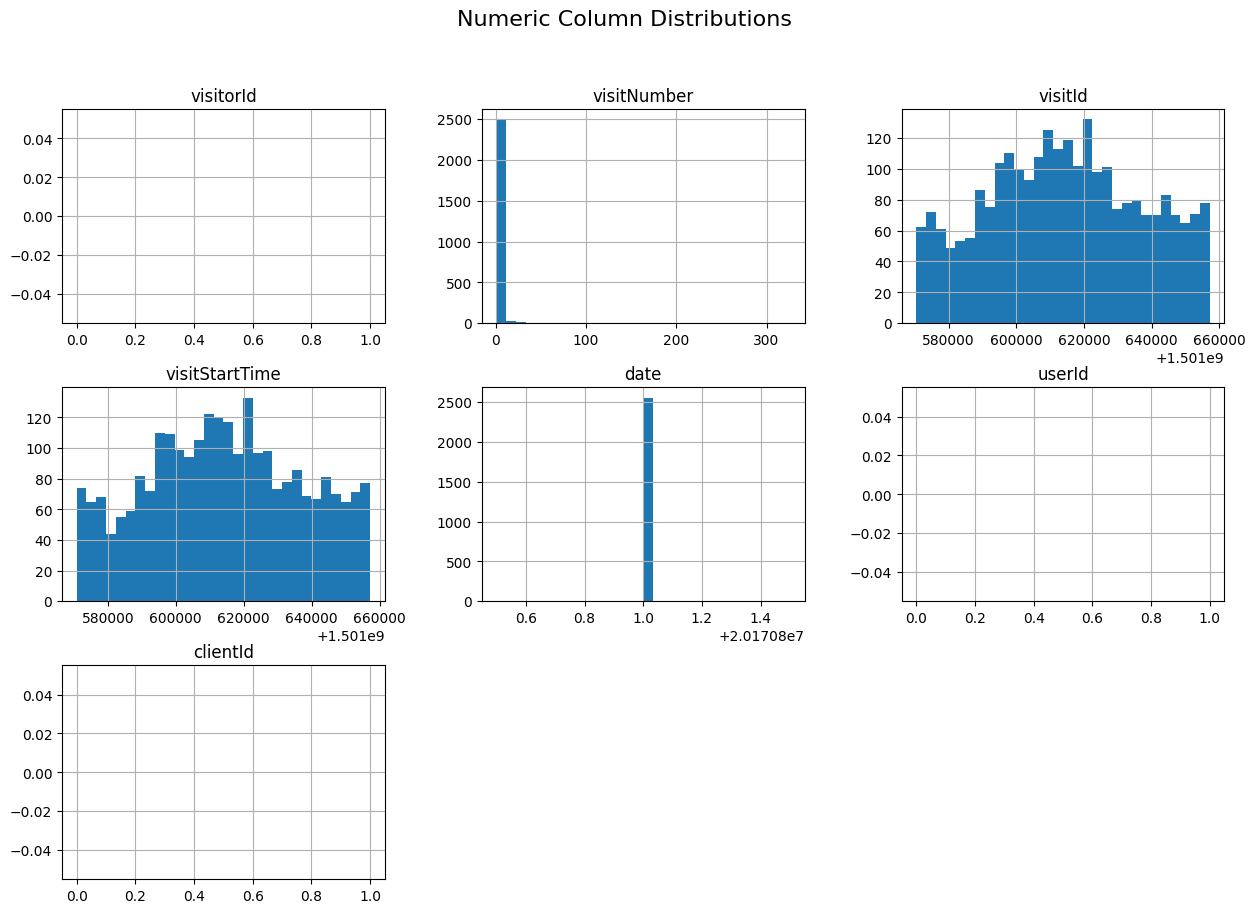

In [4]:
# Select numeric columns for histograms
num_cols = df.select_dtypes(include=["int64", "float64"]).columns

df[num_cols].hist(figsize=(15, 10), bins=30)
plt.suptitle("Numeric Column Distributions", fontsize=16)
plt.show()


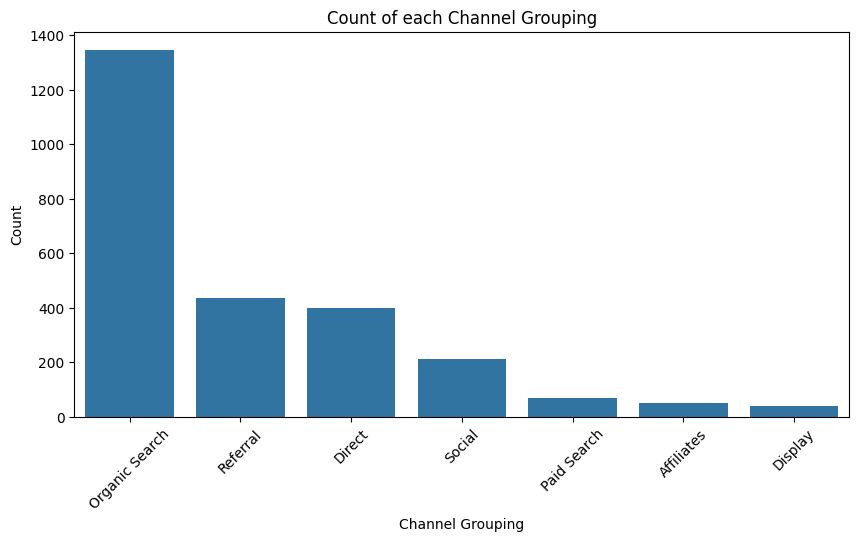

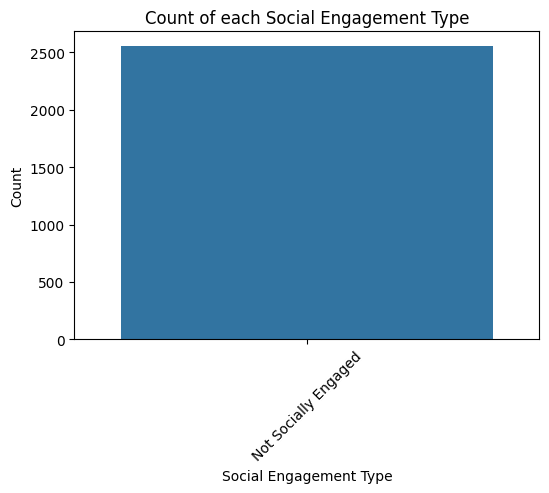

In [11]:
# Countplot for channelGrouping
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='channelGrouping', order=df['channelGrouping'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Count of each Channel Grouping")
plt.xlabel("Channel Grouping")
plt.ylabel("Count")
plt.show()

# Countplot for socialEngagementType
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='socialEngagementType', order=df['socialEngagementType'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Count of each Social Engagement Type")
plt.xlabel("Social Engagement Type")
plt.ylabel("Count")
plt.show()


In [13]:
df['totals'].unique()

array(["{'visits': 1, 'hits': 1, 'pageviews': 1, 'timeOnSite': None, 'bounces': 1, 'transactions': None, 'transactionRevenue': None, 'newVisits': 1, 'screenviews': None, 'uniqueScreenviews': None, 'timeOnScreen': None, 'totalTransactionRevenue': None, 'sessionQualityDim': 1}",
       "{'visits': 1, 'hits': 1, 'pageviews': 1, 'timeOnSite': None, 'bounces': 1, 'transactions': None, 'transactionRevenue': None, 'newVisits': None, 'screenviews': None, 'uniqueScreenviews': None, 'timeOnScreen': None, 'totalTransactionRevenue': None, 'sessionQualityDim': 1}",
       "{'visits': 1, 'hits': 1, 'pageviews': 1, 'timeOnSite': None, 'bounces': 1, 'transactions': None, 'transactionRevenue': None, 'newVisits': None, 'screenviews': None, 'uniqueScreenviews': None, 'timeOnScreen': None, 'totalTransactionRevenue': None, 'sessionQualityDim': 2}",
       ...,
       "{'visits': 1, 'hits': 140, 'pageviews': 93, 'timeOnSite': 2493, 'bounces': None, 'transactions': None, 'transactionRevenue': None, 'newVisit

In [15]:
cols = ['totals', 'trafficSource', 'device', 'geoNetwork', 'customDimensions', 'hits']

for col in cols:
    print(f"--- {col} ---")
    print(df[col].nunique())           # number of unique values
    

--- totals ---
1083
--- trafficSource ---
177
--- device ---
39
--- geoNetwork ---
830
--- customDimensions ---
6
--- hits ---
2536
